In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import sys
import numpy as np
from tqdm import tqdm
sys.path.append('../../')

In [2]:
%load_ext autoreload
%autoreload 2
from cobi.simulation import LATsky
from cobi.spectra import Spectra
from cobi.mle import MLE

In [3]:
libdir = '/global/cfs/cdirs/sobs/cosmic_birefringence/v0'
nside = 2048
cb_model = "iso"
beta = 0.35
alpha = 0#[-0.1,-0.1,0.2,0.2,.15,.15]
alpha_err = 0

In [4]:
lat = LATsky(libdir, nside, cb_model, beta, alpha=alpha,alpha_err=alpha_err, bandpass=False)

CMB : INFO - Loading CMB power spectra from file


CMB : INFO - Isotropic(constant) cosmic birefringence model selected
Mask : INFO - Upgrading mask LAT resolution
Noise : INFO - Noise Model:[LAT] White + 1/f noise v3.1.1


In [5]:
lat.config

{'27-1': {'fwhm': 7.4, 'opt. tube': 'LF', 'alpha': 0},
 '39-1': {'fwhm': 5.1, 'opt. tube': 'LF', 'alpha': 0},
 '93-1': {'fwhm': 2.2, 'opt. tube': 'MF', 'alpha': 0},
 '145-1': {'fwhm': 1.4, 'opt. tube': 'MF', 'alpha': 0},
 '225-1': {'fwhm': 1.0, 'opt. tube': 'HF', 'alpha': 0},
 '280-1': {'fwhm': 0.9, 'opt. tube': 'HF', 'alpha': 0},
 '27-2': {'fwhm': 7.4, 'opt. tube': 'LF', 'alpha': 0},
 '39-2': {'fwhm': 5.1, 'opt. tube': 'LF', 'alpha': 0},
 '93-2': {'fwhm': 2.2, 'opt. tube': 'MF', 'alpha': 0},
 '145-2': {'fwhm': 1.4, 'opt. tube': 'MF', 'alpha': 0},
 '225-2': {'fwhm': 1.0, 'opt. tube': 'HF', 'alpha': 0},
 '280-2': {'fwhm': 0.9, 'opt. tube': 'HF', 'alpha': 0}}

In [6]:
lat.SaveObsQUs(0)

Saving Observed QUs: 100%|██████████| 12/12 [00:00<00:00, 16969.54band/s]


In [7]:
spec = Spectra(lat, libdir, cache=True,parallel=1)
spec.compute(0, sync=True)

Spectra : INFO - Reading apodised mask from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/mask_N2048_aposcale2p0_CO_PS.fits
Spectra : INFO - Reading coupling Matrix from /global/cfs/cdirs/sobs/cosmic_birefringence/v0/spectra_2048_aposcale2p0/workspaces/coupling_matrix_N2048_fsky0p55_aposcale2p0_bw1_CO_PS.fits
Spectra : INFO - Parallelized single loop
sync x obs spectra: 100%|██████████| 6/6 [06:48<00:00, 68.10s/band] 


In [11]:
fit = "Ad + beta + alpha"
binwidth = 10
bmin = 70
bmax = 2000
mle = MLE(libdir,spec,fit, alpha_per_split=False,rm_same_tube=True,binwidth=binwidth,bmin=bmin,bmax=bmax)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected


Fitting a common polarisation angle per frequency
Don't use cross-spectra of bands within the same optical tube


In [12]:
mle.estimate_angles(0)

{'Ad': 1.0795772033378095,
 'beta': 0.3860586771132337,
 '27': -0.10333618557282376,
 '39': 0.03915974230548907,
 '93': -0.0317515480091932,
 '145': -0.03585997383315775,
 '225': -0.03137188537985622,
 '280': -0.040772390303861546}

In [25]:
ps = lat.cmb.get_cb_lensed_spectra(dl=False)

In [29]:
nell = lat.noise.Nell

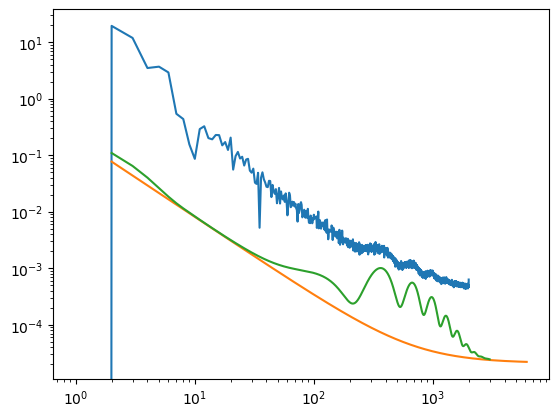

In [34]:
plt.loglog(spec.obs_x_obs(0)[3,3,0,:])
plt.loglog(nell['ell'],nell['145']*2)
plt.loglog(nell['ell'][:2998],ps['ee'][2:3000]+(nell['145']*2)[:2998])

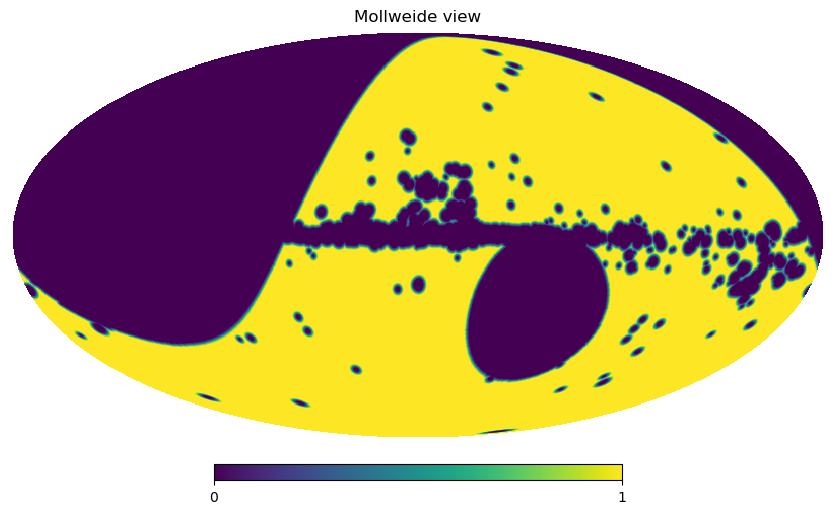

In [35]:
hp.mollview(hp.read_map('/global/cfs/cdirs/sobs/cosmic_birefringence/v0/LAT_an_2ns_lens_ncnm_b0p35_d10s5/spectra_2048_aposcale2p0_common/workspaces/mask_N2048_aposcale2p0_CO_PS.fits'))

In [15]:
numbers = 0

unique_str = ''.join('n' + f"{abs(num):g}".replace(".", "") if num < 0 else f"{num:g}".replace(".", "") for num in numbers).replace('0','')

print(unique_str)

TypeError: 'int' object is not iterable